In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anthony_wrangle

In [2]:
from anthony_wranglev2 import wrangle_credit
train, validate, test = wrangle_credit()
train

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0,0,0,0,0,0,0,0,0,0
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,7,-2,9,4,6,2,9,3,8,0
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,3,0,4,2,2,2,4,2,4,0
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,2,-1,3,2,0,1,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,5010277,M,0,1,1,562500.0,Working,Incomplete higher,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
7609,5048072,F,0,1,0,193500.0,Working,Higher education,Single / not married,House / apartment,...,6,0,8,4,4,4,8,4,8,0
12342,5068964,M,1,0,0,202500.0,Working,Higher education,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
4530,5033495,F,0,1,3,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,6,0,8,4,4,4,8,4,8,0


In [3]:
train.defaulted.value_counts()

0    17568
1       65
Name: defaulted, dtype: int64

In [4]:
base = 1 - (65/17568)
{f'Baseline is {base}'}

{'Baseline is 0.9963000910746812'}

# Looking at the relationship between our target variable and a few of the app categorical features

In [5]:
pd.crosstab(train.defaulted, train.name_family_status, margins=True)


name_family_status,Civil marriage,Married,Separated,Single / not married,Widow,All
defaulted,,,,,,
0,1398,12282,1071,2150,667,17568
1,3,47,4,9,2,65
All,1401,12329,1075,2159,669,17633


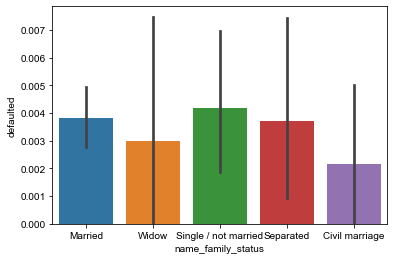

In [6]:
sns.barplot(x="name_family_status", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

In [7]:
pd.crosstab(train.defaulted, train.name_housing_type, margins=True)


name_housing_type,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,All
defaulted,,,,,,,
0,83,15683,566,115,252,869,17568
1,1,61,1,0,2,0,65
All,84,15744,567,115,254,869,17633


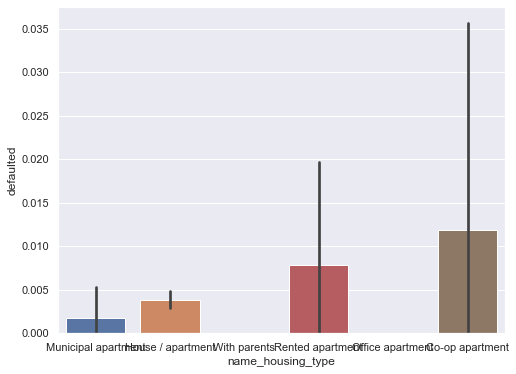

In [8]:
sns.barplot(x="name_housing_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(14,8)})

In [9]:
pd.crosstab(train.defaulted, train.name_education_type, margins=True)


name_education_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,All
defaulted,,,,,,
0,22,4842,719,198,11787,17568
1,0,20,4,0,41,65
All,22,4862,723,198,11828,17633


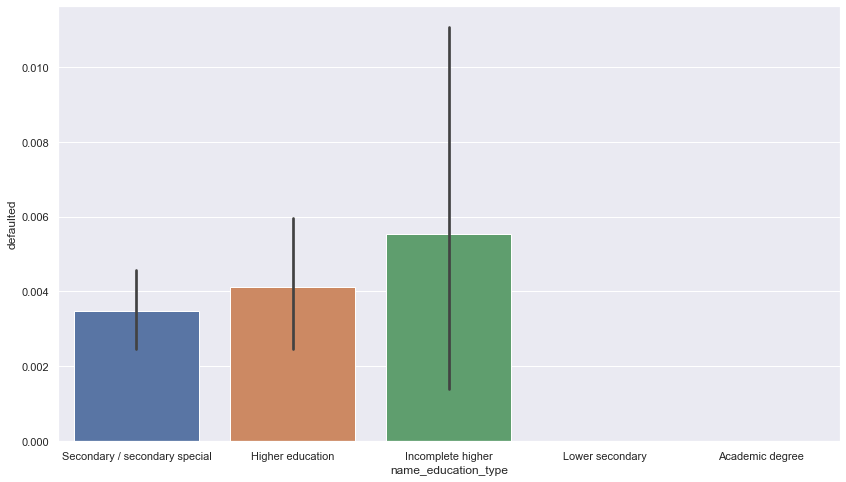

In [10]:
sns.barplot(x="name_education_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

In [11]:
pd.crosstab(train.defaulted, train.name_income_type, margins=True)


name_income_type,Commercial associate,Pensioner,State servant,Student,Working,All
defaulted,,,,,,
0,4186,2833,1525,8,9016,17568
1,20,12,5,0,28,65
All,4206,2845,1530,8,9044,17633


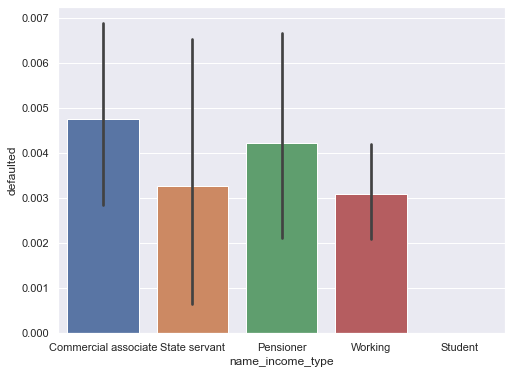

In [12]:
sns.barplot(x="name_income_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})


In [13]:
pd.crosstab(train.defaulted, train.code_gender, margins=True)


code_gender,F,M,All
defaulted,,,
0,11690,5878,17568
1,40,25,65
All,11730,5903,17633


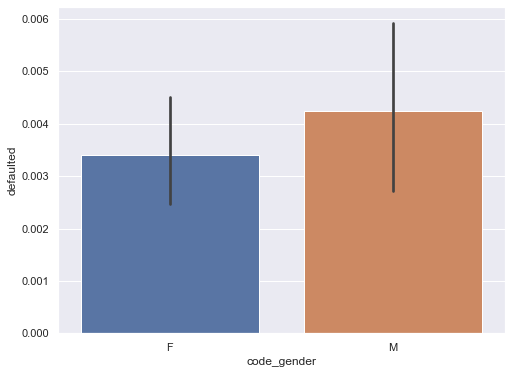

In [14]:
sns.barplot(x="code_gender", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

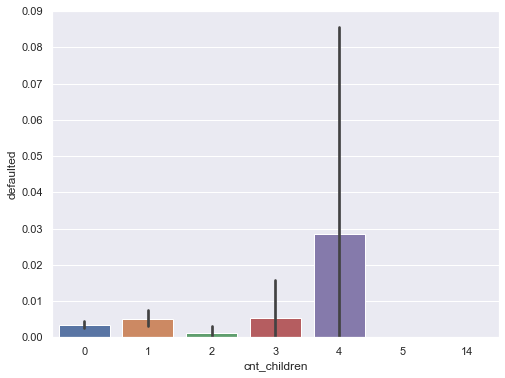

In [15]:
sns.barplot(x="cnt_children", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

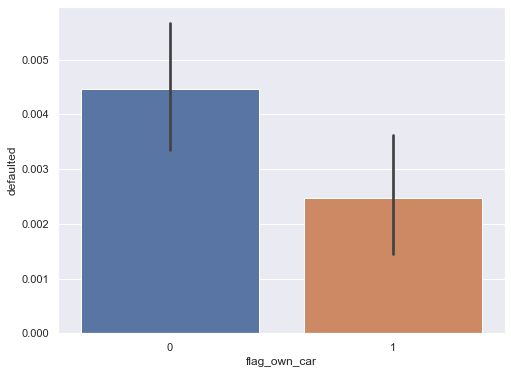

In [16]:
sns.barplot(x="flag_own_car", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

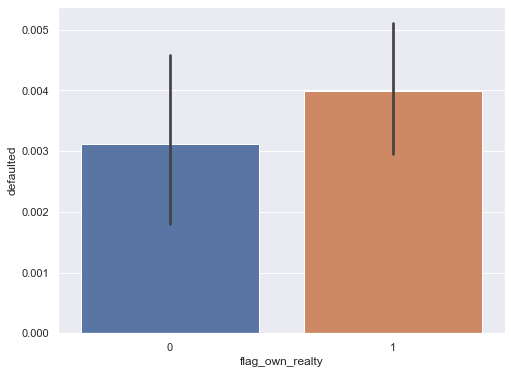

In [17]:
sns.barplot(x="flag_own_realty", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

In [18]:
train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0,0,0,0,0,0,0,0,0,0
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,7,-2,9,4,6,2,9,3,8,0
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,3,0,4,2,2,2,4,2,4,0
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,2,-1,3,2,0,1,0,3,4,0


<AxesSubplot:xlabel='beggining_ending_score', ylabel='defaulted'>

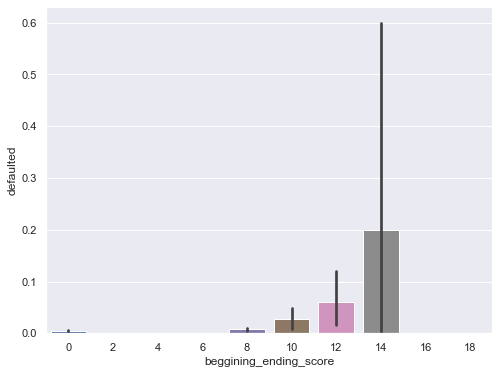

In [19]:
sns.barplot(x="beggining_ending_score", y="defaulted", data=train)


In [20]:
train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0,0,0,0,0,0,0,0,0,0
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,7,-2,9,4,6,2,9,3,8,0
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,3,0,4,2,2,2,4,2,4,0
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,2,-1,3,2,0,1,0,3,4,0


<AxesSubplot:xlabel='first_half_score', ylabel='defaulted'>

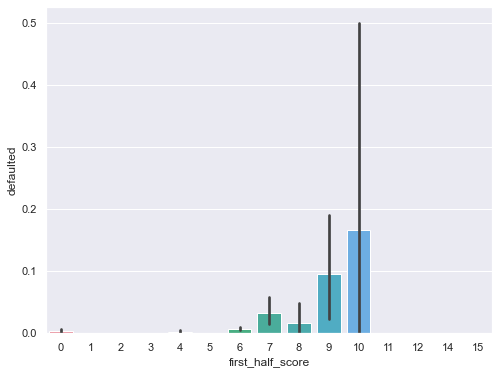

In [21]:
sns.barplot(x="first_half_score", y="defaulted", data=train)


<AxesSubplot:xlabel='amt_income_total', ylabel='name_family_status'>

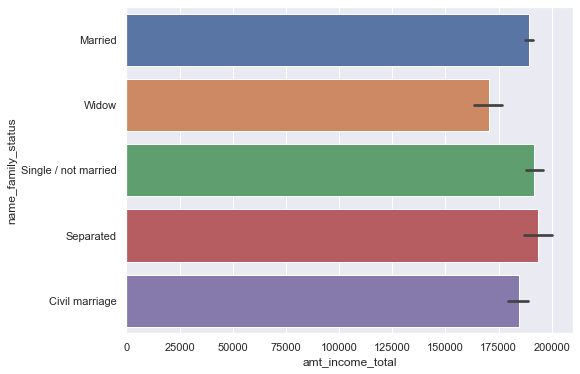

In [25]:
sns.barplot(x="amt_income_total", y="name_family_status", data=train)


# Statistical Tests

In [29]:
from scipy import stats


In [30]:
train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0,0,0,0,0,0,0,0,0,0
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,7,-2,9,4,6,2,9,3,8,0
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,3,0,4,2,2,2,4,2,4,0
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,2,-1,3,2,0,1,0,3,4,0


**H0: Default is independent of income type**



In [33]:
observed = pd.crosstab(train.defaulted, train.name_income_type, margins=True)


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 4186  2833  1525     8  9016 17568]
 [   20    12     5     0    28    65]
 [ 4206  2845  1530     8  9044 17633]]
---
Expected

[[4.19049555e+03 2.83451256e+03 1.52436001e+03 7.97050984e+00
  9.01066137e+03 1.75680000e+04]
 [1.55044519e+01 1.04874383e+01 5.63999319e+00 2.94901605e-02
  3.33386264e+01 6.50000000e+01]
 [4.20600000e+03 2.84500000e+03 1.53000000e+03 8.00000000e+00
  9.04400000e+03 1.76330000e+04]]
---

chi^2 = 2.4878
p     = 0.9911


In [35]:
#Affirm that the null hypothesis is true

**H0: Default is independent of education type**


In [36]:
observed = pd.crosstab(train.defaulted, train.name_education_type, margins=True)


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   22  4842   719   198 11787 17568]
 [    0    20     4     0    41    65]
 [   22  4862   723   198 11828 17633]]
---
Expected

[[2.19189021e+01 4.84407735e+03 7.20334827e+02 1.97270119e+02
  1.17843988e+04 1.75680000e+04]
 [8.10979414e-02 1.79226450e+01 2.66517325e+00 7.29881472e-01
  4.36012023e+01 6.50000000e+01]
 [2.20000000e+01 4.86200000e+03 7.23000000e+02 1.98000000e+02
  1.18280000e+04 1.76330000e+04]]
---

chi^2 = 1.8824
p     = 0.9972


In [38]:
#Affirm that the null hypothesis is true

**H0: Default is independent of housing type**


In [39]:
observed = pd.crosstab(train.defaulted, train.name_housing_type, margins=True)


In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   83 15683   566   115   252   869 17568]
 [    1    61     1     0     2     0    65]
 [   84 15744   567   115   254   869 17633]]
---
Expected

[[8.36903533e+01 1.56859634e+04 5.64909885e+02 1.14576079e+02
  2.53063687e+02 8.65796631e+02 1.75680000e+04]
 [3.09646685e-01 5.80366359e+01 2.09011513e+00 4.23921057e-01
  9.36312596e-01 3.20336868e+00 6.50000000e+01]
 [8.40000000e+01 1.57440000e+04 5.67000000e+02 1.15000000e+02
  2.54000000e+02 8.69000000e+02 1.76330000e+04]]
---

chi^2 = 7.1209
p     = 0.8495


In [42]:
#Affirm that the null hypothesis is true

**H0: Default is independent of family status**


In [43]:
observed = pd.crosstab(train.defaulted, train.name_family_status, margins=True)


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 1398 12282  1071  2150   667 17568]
 [    3    47     4     9     2    65]
 [ 1401 12329  1075  2159   669 17633]]
---
Expected

[[1.39583554e+03 1.22835520e+04 1.07103726e+03 2.15104134e+03
  6.66533885e+02 1.75680000e+04]
 [5.16446436e+00 4.54480236e+01 3.96274032e+00 7.95865706e+00
  2.46611467e+00 6.50000000e+01]
 [1.40100000e+03 1.23290000e+04 1.07500000e+03 2.15900000e+03
  6.69000000e+02 1.76330000e+04]]
---

chi^2 = 1.1892
p     = 0.9996


In [46]:
#Affirm that the null hypothesis is true

**H0: Default is independent of gender**


In [47]:
observed = pd.crosstab(train.defaulted, train.code_gender, margins=True)


In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[11690  5878 17568]
 [   40    25    65]
 [11730  5903 17633]]
---
Expected

[[11686.76005217  5881.23994783 17568.        ]
 [   43.23994783    21.76005217    65.        ]
 [11730.          5903.         17633.        ]]
---

chi^2 = 0.7279
p     = 0.9478


In [49]:
#Affirm that the null hypothesis is true

**H0: There is no difference in the income for those who defaulted and those who didn't.**

In [78]:
x1 = train[train.defaulted == 0].amt_income_total
x2 = train[train.defaulted == 1].amt_income_total

In [79]:
alpha = .05

In [80]:
t, p = stats.ttest_ind(x1, x2)

In [81]:
print(f't = {t:.3f}')
print(f'p = {p}')

t = -1.914
p = 0.05557260894292281


In [67]:
p < alpha

False

In [57]:
#Affirm that the null hypothesis is true

**H0: There is no difference in the first half score for those who defaulted and those who didn't.**

In [71]:
x1 = train[train.defaulted == 0].first_half_score
x2 = train[train.defaulted == 1].first_half_score

In [72]:
t, p = stats.ttest_ind(x1, x2)

In [76]:
print(f't = {t:.3f}')
print(f'p = {p}')

t = -7.254
p = 4.221197542811708e-13


In [77]:
p < alpha

True

# Reject the null hypothesis. There is a signficant relationship between whether or not a person defaults and their first half score.

**H0: There is no difference in the ending score for those who defaulted and those who didn't.**

In [86]:
x1 = train[train.defaulted == 0].ending_score
x2 = train[train.defaulted == 1].ending_score

In [87]:
t, p = stats.ttest_ind(x1, x2)

In [88]:
print(f't = {t:.3f}')
print(f'p = {p}')

t = -11.510
p = 1.5040508748460857e-30


In [89]:
p < alpha

True

# Reject the null hypothesis. There is a signficant relationship between whether or not a person defaults and their first half score.